In [44]:
import pandas as pd
import numpy as np


In [45]:
test = pd.DataFrame({"f1" : [-1, 0.3333,-1, 0.33333,1.33333],
             "f2" : [-0.63246, 1.26491, 0.63246, 0, -1.26491],
             "f3" : [0, 1.73205, -0.57735, -0.57735 ,-0.57735],
             "f4" : [0.26062, 1.56374, -0.17375, -1.04249, -0.60812]})

In [46]:
data = pd.read_csv("archive/bodyPerformance.csv")

In [47]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [48]:
Y = data["class"]

In [49]:
data.drop(columns = ["gender", "class"], inplace = True)

In [50]:
data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [51]:

def data_normalisation(scaled_data):
    for col in scaled_data.columns:
        scaled_data[col] = (scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std() #data normalisation 
    
    return scaled_data

In [52]:
scaled_data = data_normalisation(data)

In [53]:
scaled_data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717405,0.443856,0.652126,-0.267357,0.112005,-0.015959,1.688127,0.377303,1.416909,0.673983
1,-0.864187,-0.422450,-0.974698,-1.039042,-0.167272,-0.287810,-0.053071,0.128979,0.926599,0.974977
2,-0.423841,1.310163,0.883094,-0.432718,1.229112,1.479221,0.737527,-0.379495,0.646422,-0.228996
3,-0.350450,0.704935,0.305672,-0.666979,-0.260364,1.139407,0.417523,-0.001096,0.926599,0.724149
4,-0.644014,0.621865,0.021146,-0.846121,-0.818918,-0.219847,0.615172,1.406076,0.366245,0.673983
...,...,...,...,...,...,...,...,...,...,...
13388,-0.864187,0.420122,0.364252,-0.970141,-0.446549,0.731631,-0.109543,0.259053,0.506334,0.197411
13389,-1.157752,1.322030,-0.296855,-1.535125,-0.446549,-0.151884,-0.373076,-1.668418,0.576378,-0.580155
13390,0.163287,1.025350,1.092305,-0.432718,-0.074180,0.119967,2.497549,0.140804,0.366245,0.974977
13391,1.998064,-2.665352,-0.815698,2.364642,-1.005102,-0.627623,-1.662504,-0.710595,-2.785744,-2.887770


In [54]:
def covariance_calculation(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()
        
        return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted))

In [55]:
scaled_data.cov()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


In [56]:
cov_calc = covariance_calculation(scaled_data)

In [57]:
cov_calc.shape

(10, 10)

In [58]:
from numpy.linalg import eig

w,v=eig(cov_calc)

In [59]:
print(w)
print(v)

[4.1807462  2.05372432 1.2126157  0.78926983 0.65115152 0.09974436
 0.17425401 0.21444483 0.30452217 0.31878041]
[[-0.20808912  0.37925212  0.04664806  0.74629921 -0.22918411  0.09108812
   0.22239345  0.26222253 -0.25558157  0.0967696 ]
 [ 0.42072583  0.07588804 -0.23475395  0.04481827 -0.12482537  0.48063096
   0.1152247   0.3481329   0.43306061 -0.43761908]
 [ 0.33715202  0.29973208 -0.32000643 -0.16500368 -0.47863243 -0.65077626
   0.04756182  0.10306391 -0.01231538  0.03498801]
 [-0.3306508   0.23999607 -0.17520106 -0.53635166 -0.39475802  0.47884922
   0.17937913 -0.01236866 -0.22172964  0.21926937]
 [ 0.10611909  0.50880559  0.39806376 -0.24930419  0.24892848 -0.04183504
  -0.02371223  0.04549744 -0.40013679 -0.53178096]
 [ 0.14346861  0.52157405  0.37331367 -0.06701741  0.15314654  0.04248172
  -0.00582683 -0.05906547  0.53177981  0.50194803]
 [ 0.43237264  0.09546997 -0.05749725  0.19222469 -0.21286872  0.30473561
  -0.60029778 -0.42194444 -0.27148285  0.11579622]
 [-0.0454627

<BarContainer object of 10 artists>

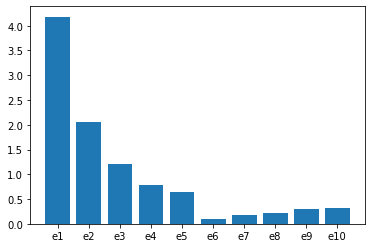

In [60]:
import matplotlib.pyplot as plt

plt.bar(["e" + str(i+1) for i in range(len(w))], w)

In [61]:
useful_pc = v[:,:3]

In [91]:
priciple_data = np.dot(data.values, useful_pc)

In [92]:
priciple_data

array([[ 2.19871193, -0.46429554,  0.2580907 ],
       [ 0.70774199, -1.54936635,  0.74982721],
       [ 1.90322116,  1.52966508,  0.32908872],
       ...,
       [ 2.55803425,  0.36410313, -0.37991379],
       [-5.79889837,  1.1901717 , -1.29366639],
       [ 0.35800167,  0.65545075,  0.37116611]])

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

componenst = pca.fit_transform(scaled_data)




In [64]:
componenst

array([[-2.19871193,  0.46429554,  0.2580907 ],
       [-0.70774199,  1.54936635,  0.74982721],
       [-1.90322116, -1.52966508,  0.32908872],
       ...,
       [-2.55803425, -0.36410313, -0.37991379],
       [ 5.79889837, -1.1901717 , -1.29366639],
       [-0.35800167, -0.65545075,  0.37116611]])

In [65]:
pca.components_

array([[ 0.20808912, -0.42072583, -0.33715202,  0.3306508 , -0.10611909,
        -0.14346861, -0.43237264,  0.04546273, -0.37851772, -0.4388099 ],
       [-0.37925212, -0.07588804, -0.29973208, -0.23999607, -0.50880559,
        -0.52157405, -0.09546997,  0.27529491,  0.2651193 ,  0.12984119],
       [ 0.04664806, -0.23475395, -0.32000643, -0.17520106,  0.39806376,
         0.37331367, -0.05749725,  0.67462234,  0.21543522,  0.0834481 ]])

## Training classification models

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
y, _ = pd.factorize(Y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.35, random_state=42)

In [86]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print("Train accuracy:",clf.score(X_train,y_train)*100)
print("Test accuracy:",clf.score(X_test,y_test)*100)

Train accuracy: 60.18380241240666
Test accuracy: 61.00682593856656


In [97]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(priciple_data, y, test_size=0.10, random_state=42)

In [98]:
clf = LogisticRegression(random_state=0).fit(X_train1, y_train1)
print("Train accuracy:",clf.score(X_train1,y_train1)*100)
print("Test accuracy:",clf.score(X_test1,y_test1)*100)

Train accuracy: 51.88749688874139
Test accuracy: 51.417910447761194
